<a href="https://colab.research.google.com/github/hiimjupter/COS40007/blob/main/Refactor_Studio3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning Pipeline for Category Management

This notebook performs the following tasks:
1. **Data Merging and Preprocessing:** Merges multiple CSV files, shuffles the dataset, and handles missing values.
2. **Exploratory Data Analysis (EDA):** Analyzes the distribution of the target variable.
3. **Feature Selection and Dimensionality Reduction:** Applies SelectKBest and PCA.
4. **Model Training and Evaluation:** Trains an SVM classifier, performs cross-validation, and hyperparameter tuning.
5. **Results Compilation:** Compiles and saves the results of different models.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Import Neccessary Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os

In [4]:
%matplotlib inline
sns.set(style="whitegrid")

## 2. Define Helper Functions

In [5]:
def merge_csv_files(csv_paths, output_path):
    """
    Merges multiple CSV files into a single CSV file.

    Parameters:
        csv_paths (list): List of file paths to CSV files.
        output_path (str): Path to save the merged CSV file.

    Returns:
        pd.DataFrame: Merged DataFrame.
    """
    try:
        # Read each CSV file into a DataFrame
        dataframes = [pd.read_csv(file) for file in csv_paths]
        # Concatenate all DataFrames vertically
        merged_df = pd.concat(dataframes, ignore_index=True)
        # Save the merged DataFrame to a new CSV file
        merged_df.to_csv(output_path, index=False)
        print(f"Successfully merged CSV files into '{output_path}'")
        return merged_df
    except Exception as e:
        print(f"Error merging CSV files: {e}")
        return pd.DataFrame()

In [6]:
def shuffle_dataframe(df, output_path):
    """
    Shuffles a DataFrame and saves it to a CSV file.

    Parameters:
        df (pd.DataFrame): DataFrame to shuffle.
        output_path (str): Path to save the shuffled CSV file.

    Returns:
        pd.DataFrame: Shuffled DataFrame.
    """
    try:
        shuffled_df = df.sample(frac=1, random_state=1).reset_index(drop=True)
        shuffled_df.to_csv(output_path, index=False)
        print(f"Successfully shuffled and saved DataFrame to '{output_path}'")
        return shuffled_df
    except Exception as e:
        print(f"Error shuffling DataFrame: {e}")
        return pd.DataFrame()

In [7]:
def load_data(file_path):
    """
    Loads a CSV file into a DataFrame.

    Parameters:
        file_path (str): Path to the CSV file.

    Returns:
        pd.DataFrame: Loaded DataFrame.
    """
    try:
        df = pd.read_csv(file_path)
        print(f"Successfully loaded data from '{file_path}'")
        return df
    except Exception as e:
        print(f"Error loading data from '{file_path}': {e}")
        return pd.DataFrame()

In [8]:
def display_missing_values(df):
    """
    Displays the count of missing values in each column.

    Parameters:
        df (pd.DataFrame): DataFrame to check for missing values.
    """
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    if not missing_values.empty:
        print("Missing Values in Each Column:")
        print(missing_values)
    else:
        print("No missing values found.")

In [9]:
def plot_class_distribution(df, target_column):
    """
    Plots the distribution of the target variable.

    Parameters:
        df (pd.DataFrame): DataFrame containing the data.
        target_column (str): Name of the target column.
    """
    class_distribution = df[target_column].value_counts()
    print("Class Distribution:")
    print(class_distribution)

    plt.figure(figsize=(8, 6))
    sns.countplot(x=target_column, data=df)
    plt.title('Class Distribution')
    plt.xlabel('Classes')
    plt.ylabel('Count')
    plt.show()

In [10]:
def evaluate_model(model, X_test, y_test, cv_folds=10):
    """
    Evaluates the model using accuracy score and cross-validation.

    Parameters:
        model: Trained machine learning model.
        X_test (pd.DataFrame): Test features.
        y_test (pd.Series): Test labels.
        cv_folds (int): Number of cross-validation folds.

    Returns:
        dict: Dictionary containing accuracy scores.
    """
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cv_scores = cross_val_score(model, X_test, y_test, cv=cv_folds)
    return {
        'accuracy': accuracy,
        'cross_val_mean': cv_scores.mean(),
        'cross_val_std': cv_scores.std()
    }

In [11]:
def perform_grid_search(X_train, y_train, param_grid, cv_folds=5):
    """
    Performs GridSearchCV to find the best hyperparameters.

    Parameters:
        X_train (pd.DataFrame): Training features.
        y_train (pd.Series): Training labels.
        param_grid (dict): Parameter grid for GridSearchCV.
        cv_folds (int): Number of cross-validation folds.

    Returns:
        GridSearchCV: Fitted GridSearchCV object.
    """
    grid_search = GridSearchCV(
        estimator=SVC(),
        param_grid=param_grid,
        cv=cv_folds
    )
    grid_search.fit(X_train, y_train)
    print("\nBest Hyperparameters:", grid_search.best_params_)
    return grid_search

## 3. Data Merging and Preprocessing

In [12]:
# Define paths
csv_files = [
    '/content/drive/MyDrive/COS40007/Studio3/Dataset/w1.csv',
    '/content/drive/MyDrive/COS40007/Studio3/Dataset/w2.csv',
    '/content/drive/MyDrive/COS40007/Studio3/Dataset/w3.csv',
    '/content/drive/MyDrive/COS40007/Studio3/Dataset/w4.csv',
]

merged_csv_path = '/content/drive/MyDrive/COS40007/Studio3/Dataset/merged_data.csv'
all_data_csv_path = '/content/drive/MyDrive/COS40007/Studio3/Dataset/all_data.csv'

# Merge CSV files
merged_df = merge_csv_files(csv_files, merged_csv_path)

# Shuffle the merged DataFrame
shuffled_df = shuffle_dataframe(merged_df, all_data_csv_path)

Successfully merged CSV files into '/content/drive/MyDrive/COS40007/Studio3/Dataset/merged_data.csv'
Successfully shuffled and saved DataFrame to '/content/drive/MyDrive/COS40007/Studio3/Dataset/all_data.csv'


## 4. Exploratory Data Analysis

Successfully loaded data from '/content/drive/MyDrive/COS40007/Studio3/Dataset/all_data.csv'
No missing values found.
Class Distribution:
class
2    9693
0    1593
1     343
Name: count, dtype: int64


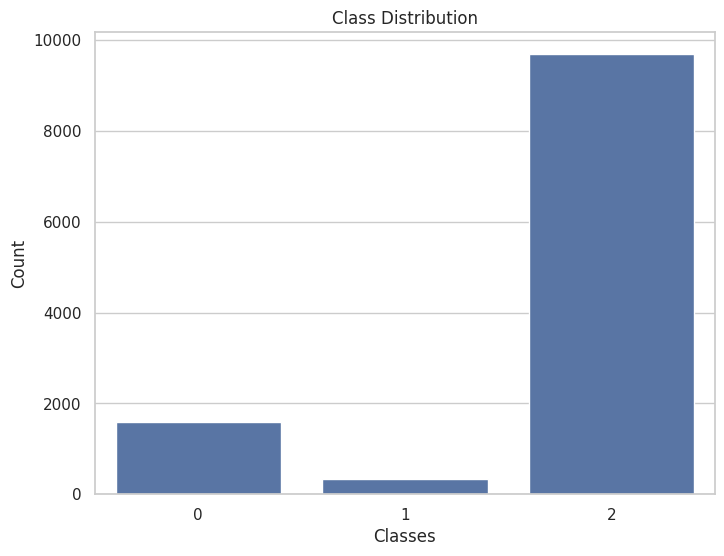

,acc_mean_x_right,acc_mean_y_right,acc_mean_z_right,acc_mean_xyz_right,acc_mean_xy_right,acc_mean_yz_right,acc_mean_zx_right,acc_mean_pitch_right,acc_mean_roll_right,acc_std_x_right,...,gyro_max_yz_left,gyro_max_zx_left,gyro_peak_x_left,gyro_peak_y_left,gyro_peak_z_left,gyro_peak_xyz_left,gyro_peak_xy_left,gyro_peak_yz_left,gyro_peak_zx_left,class
count,11629.000000,11629.000000,11629.000000,11629.000000,11629.000000,11629.000000,11629.000000,11629.000000,11629.000000,11629.000000,...,11629.000000,11629.000000,11629.000000,11629.000000,11629.000000,11629.000000,11629.000000,11629.000000,11629.000000,11629.000000
mean,-0.211198,-0.042165,0.434423,1.128481,0.889659,0.852127,0.928285,-3.868105,12.005939,0.338542,...,215.259002,128.057547,3.885631,4.621464,3.823803,4.815461,5.013243,5.037063,4.453607,1.696535
std,0.571314,0.531156,0.356463,0.135509,0.210367,0.200813,0.164721,44.447833,43.865877,0.235194,...,161.249505,93.320891,1.503805,1.612208,1.583312,1.637253,1.633782,1.667725,1.594145,0.696697
min,-1.389800,-1.134400,-0.934200,0.853040,0.106210,0.061353,0.233060,-87.790000,-89.563000,0.001612,...,0.659820,0.421630,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.660600,-0.554880,0.193610,1.021100,0.748480,0.729890,0.846750,-40.110000,-25.744000,0.161720,...,80.591000,51.398000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,2.000000
50%,-0.345500,0.123040,0.490600,1.096200,0.929220,0.898960,0.944600,-11.131000,20.289000,0.322830,...,196.910000,119.100000,4.000000,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,2.000000
75%,0.205780,0.440480,0.733890,1.193600,1.029300,0.986920,1.019100,38.559000,50.328000,0.479180,...,321.600000,189.430000,5.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000,2.000000
max,1.223800,1.125700,1.091400,2.348000,1.894300,1.964100,1.999300,86.630000,89.437000,1.928400,...,974.170000,597.960000,12.000000,12.000000,12.000000,11.000000,11.000000,11.000000,11.000000,2.000000


In [13]:
# Load the shuffled dataset
data = load_data(all_data_csv_path)

# Check for missing values
display_missing_values(data)

# Identify the target column (assuming the last column is the target)
target_column = data.columns[-1]

# Plot class distribution
plot_class_distribution(data, target_column)

# Display basic statistics
display(data.describe())

## 5. Feature Selection and Label Separation

In [14]:
# Separate features (X) and target labels (y)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Verify the shapes
print(f"Features shape: {X.shape}")  # Expected: (num_samples, num_features)
print(f"Labels shape: {y.shape}")    # Expected: (num_samples,)

Features shape: (11629, 156)
Labels shape: (11629,)


## 6. Data Splitting

In [15]:
# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=1,
    stratify=y  # Ensures the split maintains class distribution
)

# Verify the split
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")

Training features shape: (8140, 156)
Testing features shape: (3489, 156)
Training labels shape: (8140,)
Testing labels shape: (3489,)


## 7. Feature Scaling

In [16]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrame for consistency
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

## 8. Model Training and Evaluation

In [17]:
# Initialize the SVM classifier with default parameters
svm_model = SVC()

# Train the model on the scaled training data
svm_model.fit(X_train_scaled, y_train)
print("SVM model training completed.")

# Evaluate the model
evaluation_results = evaluate_model(svm_model, X_test_scaled, y_test)
print(f"Train-Test Split Accuracy: {evaluation_results['accuracy']:.4f}")
print(f"10-Fold Cross-Validation Accuracy: {evaluation_results['cross_val_mean']:.4f} ± {evaluation_results['cross_val_std']:.4f}")

SVM model training completed.
Train-Test Split Accuracy: 0.9186
10-Fold Cross-Validation Accuracy: 0.9129 ± 0.0072


## 9. Hyperparameter Tuning with GridSearchCV

In [18]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

# Perform Grid Search
grid_search = perform_grid_search(X_train_scaled, y_train, param_grid, cv_folds=3)

# Retrieve the best model
best_svm = grid_search.best_estimator_

# Evaluate the best model
best_evaluation = evaluate_model(best_svm, X_test_scaled, y_test)
print(f"Optimized Train-Test Split Accuracy: {best_evaluation['accuracy']:.4f}")
print(f"Optimized 10-Fold Cross-Validation Accuracy: {best_evaluation['cross_val_mean']:.4f} ± {best_evaluation['cross_val_std']:.4f}")



Best Hyperparameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Optimized Train-Test Split Accuracy: 0.9212
Optimized 10-Fold Cross-Validation Accuracy: 0.9111 ± 0.0100


## 10. Feature Selection with SelectKBest

In [19]:
# Select the top 100 features using SelectKBest
selector = SelectKBest(score_func=f_classif, k=100)
X_new = selector.fit_transform(X, y)

# Convert X_new back to DataFrame with selected feature names
selected_features = X.columns[selector.get_support(indices=True)]
X_new = pd.DataFrame(X_new, columns=selected_features)

# Split the dataset with selected features
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(
    X_new, y,
    test_size=0.3,
    random_state=1,
    stratify=y
)

# Scale the selected features
X_train_fs_scaled = scaler.fit_transform(X_train_fs)
X_test_fs_scaled = scaler.transform(X_test_fs)

X_train_fs_scaled = pd.DataFrame(X_train_fs_scaled, columns=selected_features)
X_test_fs_scaled = pd.DataFrame(X_test_fs_scaled, columns=selected_features)

# Train the optimal model on the selected features
best_svm.fit(X_train_fs_scaled, y_train_fs)
print("Optimized SVM model training on selected features completed.")

# Evaluate the model
fs_evaluation = evaluate_model(best_svm, X_test_fs_scaled, y_test_fs)
print(f"Feature Selection Train-Test Split Accuracy: {fs_evaluation['accuracy']:.4f}")
print(f"Feature Selection 10-Fold Cross-Validation Accuracy: {fs_evaluation['cross_val_mean']:.4f} ± {fs_evaluation['cross_val_std']:.4f}")

Optimized SVM model training on selected features completed.
Feature Selection Train-Test Split Accuracy: 0.9180
Feature Selection 10-Fold Cross-Validation Accuracy: 0.9106 ± 0.0124


## 11. Dimensionality Reduction with PCA

In [20]:
# Initialize PCA with 10 components
pca = PCA(n_components=10, random_state=1)

# Fit PCA on the entire dataset and transform
X_pca = pca.fit_transform(X)

# Convert X_pca back to DataFrame
pca_columns = [f'PC{i+1}' for i in range(10)]
X_pca = pd.DataFrame(X_pca, columns=pca_columns)

# Split the dataset with PCA features
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y,
    test_size=0.3,
    random_state=1,
    stratify=y
)

# Scale the PCA features
X_train_pca_scaled = scaler.fit_transform(X_train_pca)
X_test_pca_scaled = scaler.transform(X_test_pca)

X_train_pca_scaled = pd.DataFrame(X_train_pca_scaled, columns=pca_columns)
X_test_pca_scaled = pd.DataFrame(X_test_pca_scaled, columns=pca_columns)

# Train the optimal model on the PCA features
best_svm.fit(X_train_pca_scaled, y_train_pca)
print("Optimized SVM model training on PCA features completed.")

# Evaluate the model
pca_evaluation = evaluate_model(best_svm, X_test_pca_scaled, y_test_pca)
print(f"PCA Train-Test Split Accuracy: {pca_evaluation['accuracy']:.4f}")
print(f"PCA 10-Fold Cross-Validation Accuracy: {pca_evaluation['cross_val_mean']:.4f} ± {pca_evaluation['cross_val_std']:.4f}")

Optimized SVM model training on PCA features completed.
PCA Train-Test Split Accuracy: 0.8925
PCA 10-Fold Cross-Validation Accuracy: 0.8902 ± 0.0094


## 12. Compile and Save Results

In [21]:
# Create a DataFrame to store the results
results = pd.DataFrame({
    'Model': [
        'Original Features',
        'With Hyperparameter Tuning',
        'Feature Selection + Hyperparameter Tuning',
        'PCA + Hyperparameter Tuning'
    ],
    'Train-Test Split Accuracy': [
        evaluation_results['accuracy'],
        best_evaluation['accuracy'],
        fs_evaluation['accuracy'],
        pca_evaluation['accuracy']
    ],
    'Cross-Validation Accuracy': [
        f"{evaluation_results['cross_val_mean']:.4f} ± {evaluation_results['cross_val_std']:.4f}",
        f"{best_evaluation['cross_val_mean']:.4f} ± {best_evaluation['cross_val_std']:.4f}",
        f"{fs_evaluation['cross_val_mean']:.4f} ± {fs_evaluation['cross_val_std']:.4f}",
        f"{pca_evaluation['cross_val_mean']:.4f} ± {pca_evaluation['cross_val_std']:.4f}"
    ]
})

# Define the results directory
results_dir = '/content/drive/MyDrive/COS40007/Studio3/Result'
os.makedirs(results_dir, exist_ok=True)

# Save the results to a CSV file
results_csv_path = os.path.join(results_dir, 'results.csv')
results.to_csv(results_csv_path, index=False)
print(f"The results have been successfully saved into '{results_csv_path}'")

The results have been successfully saved into '/content/drive/MyDrive/COS40007/Studio3/Result/results.csv'


## 13. Summary

In [22]:
print("### Summary of Model Performance")
display(results)

### Summary of Model Performance


,Model,Train-Test Split Accuracy,Cross-Validation Accuracy
0,Original Features,0.918601,0.9129 ± 0.0072
1,With Hyperparameter Tuning,0.921181,0.9111 ± 0.0100
2,Feature Selection + Hyperparameter Tuning,0.918028,0.9106 ± 0.0124
3,PCA + Hyperparameter Tuning,0.892519,0.8902 ± 0.0094


## 14. Conclusion

In [23]:
print("""
The machine learning pipeline successfully merged multiple datasets, performed necessary preprocessing,
conducted exploratory data analysis, applied feature selection and dimensionality reduction techniques,
trained and evaluated an SVM classifier, and saved the results for comparison.

Key Takeaways:
- **Data Merging:** Consolidated multiple CSV files into a single dataset.
- **EDA:** Verified data integrity and analyzed class distribution.
- **Feature Engineering:** Utilized SelectKBest and PCA to enhance model performance.
- **Model Optimization:** Improved model accuracy through hyperparameter tuning.
- **Results Compilation:** Documented and saved the performance metrics for all models.

Further Improvements:
- **Model Selection:** Experiment with other algorithms like Random Forest, Gradient Boosting, etc.
- **Feature Engineering:** Explore more feature engineering techniques based on domain knowledge.
- **Handling Imbalanced Data:** If classes are imbalanced, consider techniques like SMOTE or class weighting.
- **Pipeline Integration:** Use scikit-learn pipelines to streamline the workflow and prevent data leakage.
""")


The machine learning pipeline successfully merged multiple datasets, performed necessary preprocessing,
conducted exploratory data analysis, applied feature selection and dimensionality reduction techniques,
trained and evaluated an SVM classifier, and saved the results for comparison.

Key Takeaways:
- **Data Merging:** Consolidated multiple CSV files into a single dataset.
- **EDA:** Verified data integrity and analyzed class distribution.
- **Feature Engineering:** Utilized SelectKBest and PCA to enhance model performance.
- **Model Optimization:** Improved model accuracy through hyperparameter tuning.
- **Results Compilation:** Documented and saved the performance metrics for all models.

Further Improvements:
- **Model Selection:** Experiment with other algorithms like Random Forest, Gradient Boosting, etc.
- **Feature Engineering:** Explore more feature engineering techniques based on domain knowledge.
- **Handling Imbalanced Data:** If classes are imbalanced, consider technique

## 15. Compare with other ML Classifiers

In [24]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Load your data
data = pd.read_csv('/content/drive/MyDrive/COS40007/Studio3/Dataset/all_data.csv')

# Assuming the data has a label column called 'target', split features and labels
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Define classifiers
classifiers = {
    'SGDClassifier': SGDClassifier(random_state=1),
    'RandomForestClassifier': RandomForestClassifier(random_state=1),
    'MLPClassifier': MLPClassifier(random_state=1, max_iter=1000)
}

# Initialize an empty list to collect results
results_list = []

# Train classifiers, calculate accuracy, and store results
for name, clf in classifiers.items():
    # Train-test split
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    # Cross-validation
    cv_scores = cross_val_score(clf, X_train_scaled, y_train, cv=10, scoring='accuracy')
    cv_accuracy = cv_scores.mean()

    # Store results in the list
    results_list.append({
        'Classifier': name,
        'Train-Test Accuracy': accuracy,
        'Cross-Validation Accuracy': cv_accuracy
    })

# Convert the list of results into a DataFrame
results = pd.DataFrame(results_list)

# Save results to a CSV file
results.to_csv('/content/drive/MyDrive/COS40007/Studio3/Result/results_mls.csv', index=False)

# Display the results
print(results)

               Classifier  Train-Test Accuracy  Cross-Validation Accuracy
0           SGDClassifier             0.882201                   0.885012
1  RandomForestClassifier             0.928633                   0.918428
2           MLPClassifier             0.893666                   0.894963
